In [22]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv(r'music_최종.csv', parse_dates=['발매일'], encoding='cp949')
raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803


In [23]:
raw_df['Month'] = raw_df['Month'].astype(str)
raw_df['year'] = raw_df['Month'].str[:4].astype(int)
raw_df['month'] = raw_df['Month'].str[4:].astype(int)

raw_df.head()

,순위,제목,가수,가사,장르,발매일,Month,year,month
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,201803,2018,3
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,201803,2018,3
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,201803,2018,3
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,201803,2018,3
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,201803,2018,3


In [24]:
# Month열 삭제
raw_df = raw_df.drop('Month', axis=1)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      3000 non-null   int64         
 1   제목      3000 non-null   object        
 2   가수      3000 non-null   object        
 3   가사      3000 non-null   object        
 4   장르      3000 non-null   object        
 5   발매일     3000 non-null   datetime64[ns]
 6   year    3000 non-null   int64         
 7   month   3000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 187.6+ KB


In [25]:
# 기존 데이터프레임에 계절 정보 추가(np.where(조건, 참일 때, 거짓일 때))
raw_df['season'] = np.where(raw_df['month'].isin([3, 4, 5]), '봄',
                   np.where(raw_df['month'].isin([6, 7, 8]), '여름',
                   np.where(raw_df['month'].isin([9, 10, 11]), '가을', '겨울')))
raw_df.head()


,순위,제목,가수,가사,장르,발매일,year,month,season
0,1,사랑을 했다 (LOVE SCENARIO),iKON,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,랩/힙합,2018-01-25,2018,3,봄
1,2,별이 빛나는 밤,마마무 (Mamamoo),손끝이 시리더니 벌써 봄이 왔네 꿈같은 바람이 불어 곳곳에 여느 때 와는 다른 듯한...,댄스,2018-03-07,2018,3,봄
2,3,뿜뿜,모모랜드 (MOMOLAND),설레어 너와 나의 랑데뷰 랑데뷰 내 마음을 들었다 놨다 해 맘대루 맘대루 지금 내 ...,댄스,2018-01-03,2018,3,봄
3,4,그날처럼,장덕철,참 많은 시간이 흘러가고 넌 어떻게 사는지 참 궁금해 날 걱정하는 사람들에게 다 잊...,발라드,2017-11-28,2018,3,봄
4,5,꽃 길,BIGBANG (빅뱅),그땐 참 좋았는데 말이야 너와 함께할 수만 있다면 때론 외롭고 슬퍼도 말이야 너와 ...,R&B/Soul,2018-03-13,2018,3,봄


In [26]:
spring = raw_df[raw_df['season'] == '봄']
summer = raw_df[raw_df['season'] == '여름']
fall = raw_df[raw_df['season'] == '가을']
winter = raw_df[raw_df['season'] == '겨울']

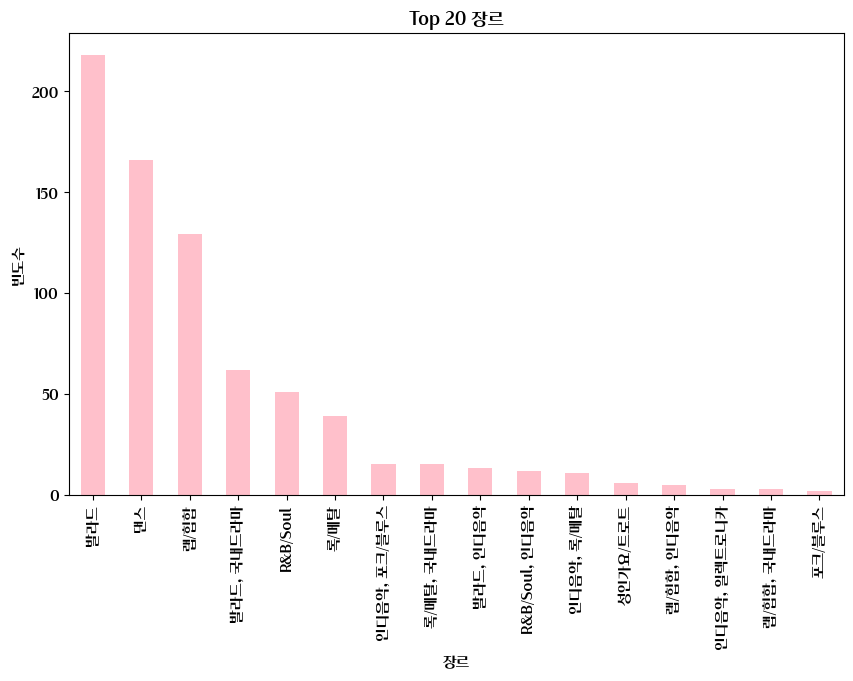

In [27]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

value_counts = spring['장르'].value_counts().head(20)

font_path= "/Users/yoosukyeong/Library/Fonts/LeferiPointBlack.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()

plt.figure(figsize=(10, 6))  
plt.rc('font', family=font_name)
value_counts.plot(kind='bar', color='pink')  
plt.title('봄 Top 20 장르') 
plt.xlabel('장르')  
plt.ylabel('빈도수') 
plt.show()  


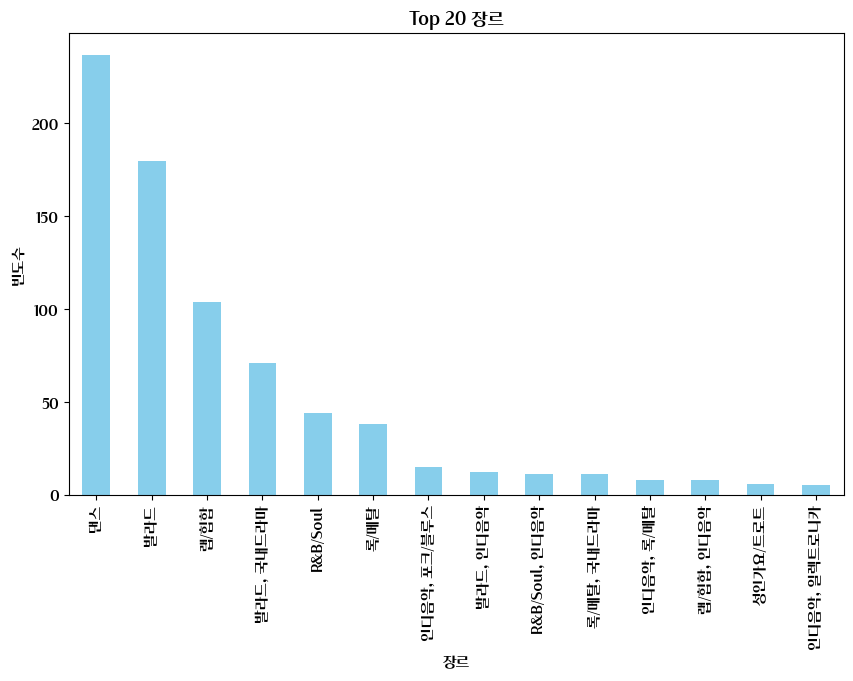

In [28]:
import matplotlib.pyplot as plt

value_counts = summer['장르'].value_counts().head(20)

plt.figure(figsize=(10, 6))  
value_counts.plot(kind='bar', color='skyblue') 
plt.title('여름 Top 20 장르')  
plt.xlabel('장르')
plt.ylabel('빈도수')
plt.show()


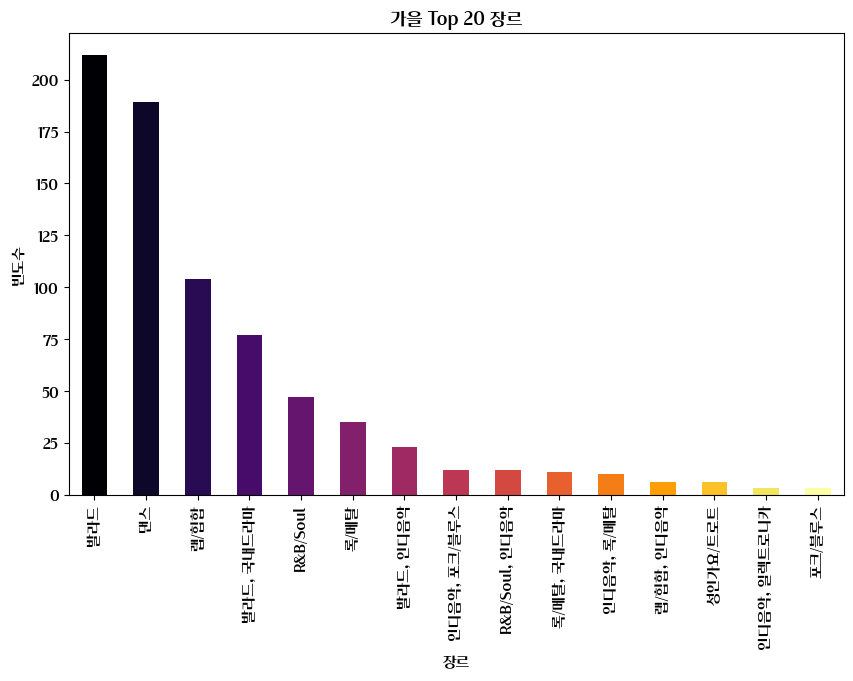

In [38]:
import matplotlib.pyplot as plt
import numpy as np

value_counts = fall['장르'].value_counts().head(20)

# 색상 표 선택 (viridis 색상 표)
cmap = plt.get_cmap('inferno')

# 색상 리스트 생성
colors = cmap(np.linspace(0, 1, len(value_counts)))

plt.figure(figsize=(10, 6))  
bars = value_counts.plot(kind='bar', color=colors) 
plt.title('가을 Top 20 장르')  
plt.xlabel('장르')
plt.ylabel('빈도수')
plt.show()

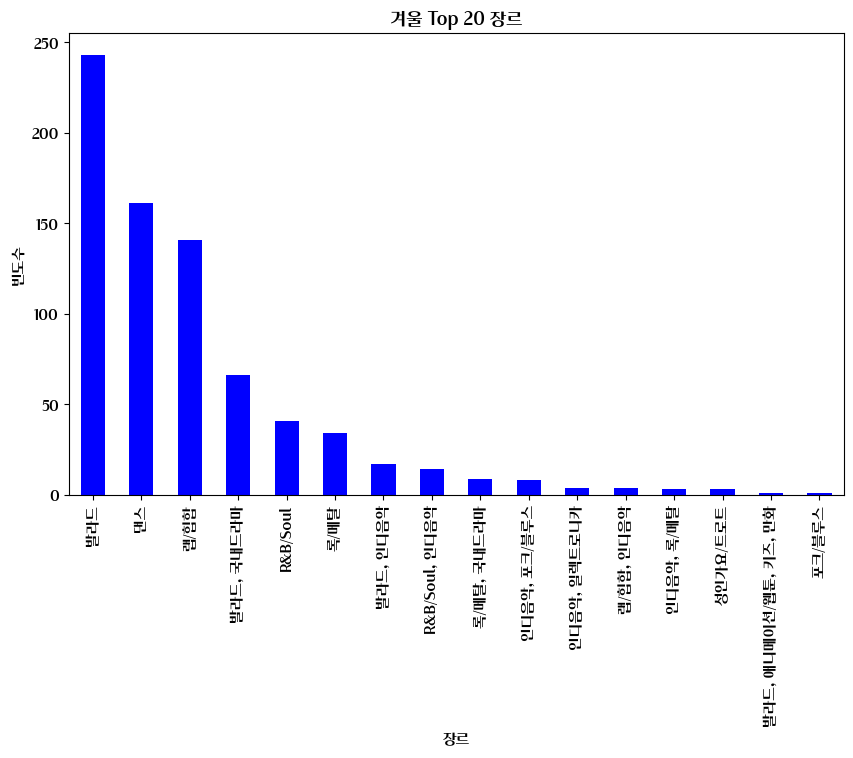

In [33]:
import matplotlib.pyplot as plt

value_counts = winter['장르'].value_counts().head(20)

plt.figure(figsize=(10, 6))  
value_counts.plot(kind='bar', color='blue') 
plt.title('겨울 Top 20 장르')  
plt.xlabel('장르')
plt.ylabel('빈도수')
plt.show()